In [ ]:
from sympy import symbols, Function, diff, simplify, latex

# Define symbols
lam = symbols('lambda')
z = Function('z')(lam)
dA = Function('d_A')(lam)
H = Function('mathcal{H}')(lam)
theta = Function('hat{theta}')(lam)
sigma_sq = Function('|hat{sigma}|^2')(lam) # Treated as a scalar magnitude squared
R = Function('mathcal{R}')(lam)

# 1. Define Basic Derivatives w.r.t lambda (from note_for_jonas.pdf Eq 1)
# dz/dlambda = -(1+z)^2 * H
dz_dlam = -(1 + z)**2 * H

# d(dA)/dlambda = 0.5 * theta * dA
ddA_dlam = 0.5 * theta * dA

# d(theta)/dlambda = -0.5*theta^2 - 2*sigma^2 - R (Raychaudhuri Eq)
dtheta_dlam = -0.5 * theta**2 - 2 * sigma_sq - R

# 2. Define the Operator d/dz
def d_dz(expression):
    # Chain rule: d/dz = (d/dlambda) * (dlambda/dz)
    # dlambda/dz = 1 / (dz/dlambda) = -1 / ((1+z)^2 * H)
    expr_dlam = diff(expression, lam)
    
    # Substitute known transport derivatives
    # Note: We must substitute d(dA)/dlam and d(theta)/dlam. 
    # We leave dH/dlam, dR/dlam, dSigma/dlam as symbolic derivatives.
    expr_dlam = expr_dlam.subs({
        diff(dA, lam): ddA_dlam,
        diff(theta, lam): dtheta_dlam,
        diff(z, lam): dz_dlam
    })
    
    return -1 / ((1 + z)**2 * H) * expr_dlam

# 3. Define the Second Derivative (Eq 5 from note_for_jonas.pdf)
# Term in brackets: K
# Note: The note uses H^{-1} * H' which is (1/H) * diff(H, lam)
K = -2 * sigma_sq - R + 2 * theta * (1 + z) * H - theta * (1/H) * diff(H, lam)

# Full 2nd derivative expression
d2dA_dz2 = (dA / (2 * (1 + z)**4 * H**2)) * K

# 4. Compute the Third Derivative
d3dA_dz3 = d_dz(d2dA_dz2)

# Simplify
result = simplify(d3dA_dz3)

print("Symbolic Expression for d^3(dA)/dz^3:")
print(result)

# To view in LaTeX format for your note:
print("\nLaTeX Code:")
print(latex(result))

Symbolic Expression for d^3(dA)/dz^3:
(4*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*(z(lambda) + 1)*mathcal{H}(lambda)**2 + 0.5*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*hat{theta}(lambda)*mathcal{H}(lambda) - 2*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*Derivative(mathcal{H}(lambda), lambda) + (-(0.5*hat{theta}(lambda)**2 + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*Derivative(mathcal{H}(lambda), lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), (lambda, 2)))*mathcal{H}(lambda) + (2*(z(lambda) + 1)**2*hat{theta}(lambda)*mathcal{H}(lambda)**2 +

In [ ]:
result

(4*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*(z(lambda) + 1)*mathcal{H}(lambda)**2 + 0.5*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*hat{theta}(lambda)*mathcal{H}(lambda) - 2*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*Derivative(mathcal{H}(lambda), lambda) + (-(0.5*hat{theta}(lambda)**2 + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*Derivative(mathcal{H}(lambda), lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), (lambda, 2)))*mathcal{H}(lambda) + (2*(z(lambda) + 1)**2*hat{theta}(lambda)*mathcal{H}(lambda)**2 + 2*(z(lambda) + 1)*(0.5*hat{theta}(lam

In [11]:
k0_cart = [1, 2, 3]
#k0_cnorm = k0_cart / sqrt(k0_cart[1]^2 + k0_cart[2]^2 + k0_cart[3]^2)

3-element Vector{Int64}:
 1
 2
 3

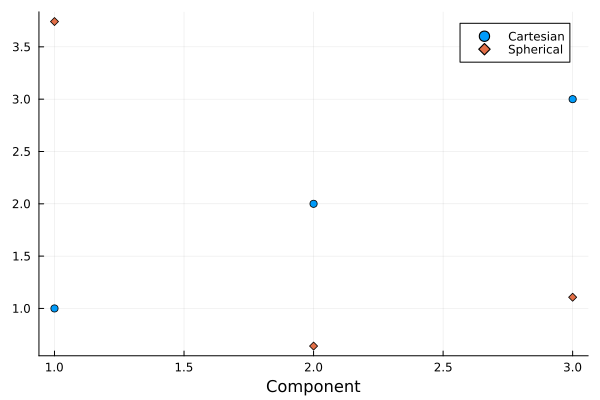

In [ ]:
kr = sqrt(k0_cart[1]^2 + k0_cart[2]^2 + k0_cart[3]^2)
kθ = atan(sqrt(k0_cart[1]^2 + k0_cart[2]^2), k0_cart[3])
kϕ = atan(k0_cart[2], k0_cart[1])



SystemError: SystemError: opening file "data/healpix_kx512.dat": No such file or directory

In [11]:
using NPZ

Nside = 1
xyzs = npzread("data/healpix_$(Nside).npy")

12×3 Matrix{Float64}:
  0.527046      0.527046      0.666667
 -0.527046      0.527046      0.666667
 -0.527046     -0.527046      0.666667
  0.527046     -0.527046      0.666667
  1.0           0.0           6.12323e-17
  6.12323e-17   1.0           6.12323e-17
 -1.0           1.22465e-16   6.12323e-17
 -1.83697e-16  -1.0           6.12323e-17
  0.527046      0.527046     -0.666667
 -0.527046      0.527046     -0.666667
 -0.527046     -0.527046     -0.666667
  0.527046     -0.527046     -0.666667

In [12]:
for xyz in eachrow(xyzs)
    kx0, ky0, kz0 = xyz
    println("kx0: $kx0, ky0: $ky0, kz0: $kz0")
end

kx0: 0.5270462766947299, ky0: 0.5270462766947298, kz0: 0.6666666666666666
kx0: -0.5270462766947298, ky0: 0.5270462766947299, kz0: 0.6666666666666666
kx0: -0.5270462766947301, ky0: -0.5270462766947296, kz0: 0.6666666666666666
kx0: 0.5270462766947298, ky0: -0.52704627669473, kz0: 0.6666666666666666
kx0: 1.0, ky0: 0.0, kz0: 6.123233995736766e-17
kx0: 6.123233995736766e-17, ky0: 1.0, kz0: 6.123233995736766e-17
kx0: -1.0, ky0: 1.2246467991473532e-16, kz0: 6.123233995736766e-17
kx0: -1.8369701987210297e-16, ky0: -1.0, kz0: 6.123233995736766e-17
kx0: 0.5270462766947298, ky0: 0.5270462766947298, kz0: -0.6666666666666667
kx0: -0.5270462766947298, ky0: 0.5270462766947298, kz0: -0.6666666666666667
kx0: -0.5270462766947301, ky0: -0.5270462766947295, kz0: -0.6666666666666667
kx0: 0.5270462766947297, ky0: -0.5270462766947299, kz0: -0.6666666666666667


In [19]:
using Healpix

Nside = 1
npix  = nside2npix(Nside)

m = HealpixMap{Float64, NestedOrder}(Nside)

theta = zeros(Float64, npix)
phi   = zeros(Float64, npix)

for i in 1:npix
    theta[i], phi[i] = pix2ang(m, i)
end
xyzs = ang2vec.(theta, phi)

12-element Vector{Tuple{Float64, Float64, Float64}}:
 (0.5270462766947299, 0.5270462766947298, 0.6666666666666666)
 (-0.5270462766947298, 0.5270462766947299, 0.6666666666666666)
 (-0.5270462766947301, -0.5270462766947296, 0.6666666666666666)
 (0.5270462766947298, -0.52704627669473, 0.6666666666666666)
 (1.0, 0.0, 6.123233995736766e-17)
 (6.123233995736766e-17, 1.0, 6.123233995736766e-17)
 (-1.0, 1.2246467991473532e-16, 6.123233995736766e-17)
 (-1.8369701987210297e-16, -1.0, 6.123233995736766e-17)
 (0.5270462766947298, 0.5270462766947298, -0.6666666666666667)
 (-0.5270462766947298, 0.5270462766947298, -0.6666666666666667)
 (-0.5270462766947301, -0.5270462766947295, -0.6666666666666667)
 (0.5270462766947297, -0.5270462766947299, -0.6666666666666667)

In [24]:
kx0, ky0, kz0 = xyzs[1].*0.1

(0.052704627669472995, 0.05270462766947298, 0.06666666666666667)

In [25]:
kx0

0.052704627669472995